## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from data_processing import *

In [148]:
df_1, _ = get_clustered_data_with_bus_only('./data/SZP-2021-09-03.csv', crowding=[0,1])

Amount of invalid data: 2


In [157]:
import copy 
df_x = copy.deepcopy(df_1)

In [158]:
df = get_numeric_name(df_x, "Nazwa przystanku", drop=True)

df['Przystanek'] = df['Numeryczna Nazwa przystanku'] * 100 + df['Numer przystanku']

# features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Przystanek', 'Liczba wysiadających pasaz.', 'Liczba wsiadajacych pasaz.', 'Opóźnienie w minutach']
features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Godzina odjazdu przedział', 'Przystanek', 'Liczba wysiadających pasaz.', 'Liczba wsiadajacych pasaz.']
class_labels = ["class"]
regress_labels = ["Liczba pasaz. przed"]

In [159]:
df.sample(3)

,Nr linii,Wariant linii,Kurs,Oznaczenie brygady,Numer taborowy,Numer przystanku,Rzeczywisty czas odjazdu,Rozkładowy czas odjazdu,Liczba pasaz. przed,Liczba wysiadających pasaz.,Liczba wsiadajacych pasaz.,Liczba pasaz. po odjezdzie,Godzina odjazdu,Godzina odjazdu przedział,Opóźnienie w minutach,class,Numeryczna Nazwa przystanku,Przystanek
62507,179,TP-UPN,2022-01-30 08:28:00,4,9325,4,2022-01-30 08:59:00,2022-01-30 09:07:00,12,2,2,12,9.116667,36,-8,0,826,82604
97344,207,TP-REG,2022-01-30 19:47:00,2,9242,4,2022-01-30 19:53:00,2022-01-30 19:52:00,3,1,0,2,19.866667,79,1,0,1158,115804
93651,203,TP-FWA,2022-01-30 16:32:00,1,9203,1,2022-01-30 16:40:00,2022-01-30 16:44:00,8,4,0,4,16.733333,66,-4,0,1160,116001


## Classification

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [161]:
X_train, X_test, y_train, y_test = get_train_and_test_by_lines(df, features, class_labels)

### Logistic Regression 2 classes

#### Default input data

Accuracy score normal 0.8643770368513412


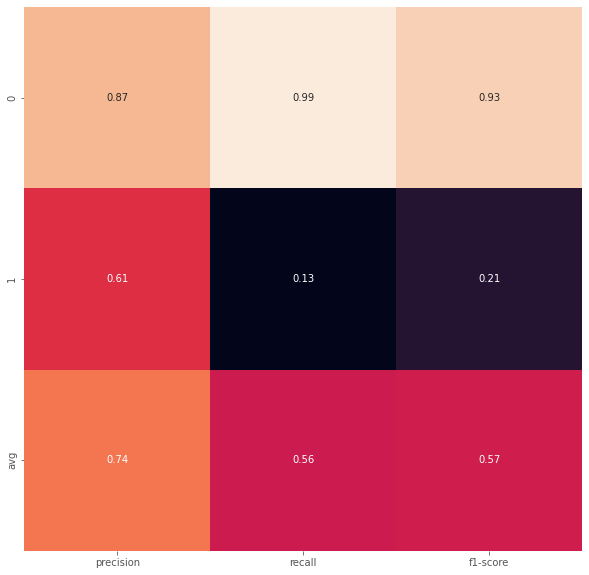

In [162]:
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state = 0)  
classifier.fit(X_train, np.ravel(y_train.T))

y_pred = classifier.predict(X_test) 
err3 = accuracy_score(y_pred,y_test)
print(f"Accuracy score normal {err3}")
plot_classification_report(y_test, y_pred)

#### Oversampling

Accuracy score 0.7232389069942341
[[2540  882]
 [ 222  345]]


C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


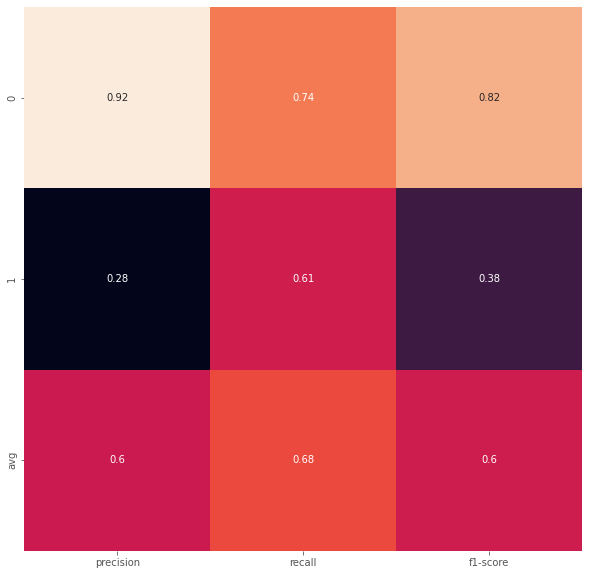

In [163]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = np.ravel(os_data_y.T)

#Classifying and prediction
classifier = LogisticRegression(random_state = 0)  #Logistic classifier

classifier.fit(os_data_X, os_data_y)

y_pred = classifier.predict(X_test)  #predicting test results
err3 = classifier.score(X_test,y_test)
print(f"Accuracy score {err3}")
plot_classification_report(y_test, y_pred)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#### Undersampling



Undersampled from:  35861  to:  9882
Accuracy score normal 0.704687891702181
[[2506  916]
 [ 262  305]]


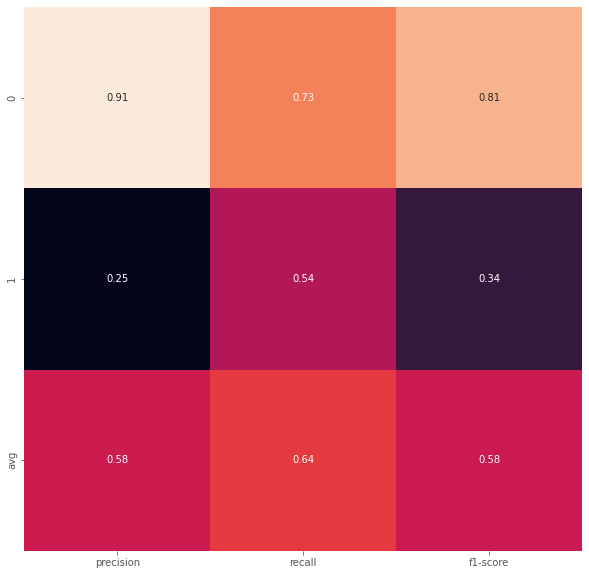

In [164]:
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix

undersample = NearMiss(version=3, n_neighbors_ver3=3)
undersampled_x, undersampled_y = undersample.fit_resample(X_train, y_train)
print("Undersampled from: ", len(y_train), " to: ",  len(undersampled_y))

undersampled_classifier = LogisticRegression(random_state = 0) 
undersampled_classifier.fit(undersampled_x, np.ravel(undersampled_y.T) )

y_pred = undersampled_classifier.predict(X_test) 
err3 = accuracy_score(y_pred,y_test)

print(f"Accuracy score normal {err3}")
plot_classification_report(y_test, y_pred)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


### Logistic regression 3 classes

In [142]:
df_2, _  = get_clustered_data_with_bus_only('./data/SZP-2021-09-03.csv', crowding=[0,1,2])

Amount of invalid data: 2


In [165]:
import copy 
df_y = copy.deepcopy(df_2)

In [166]:
df2 = get_numeric_name(df_y, "Nazwa przystanku", drop=True)

df2['Przystanek'] = df2['Numeryczna Nazwa przystanku'] * 100 + df2['Numer przystanku']

# features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Przystanek', 'Liczba wysiadających pasaz.', 'Liczba wsiadajacych pasaz.', 'Opóźnienie w minutach']
features = ['Nr linii', 'Numer taborowy', 'Godzina odjazdu', 'Godzina odjazdu przedział', 'Przystanek',  'Liczba wysiadających pasaz.', 'Liczba wsiadajacych pasaz.']
class_labels = ["class"]
regress_labels = ["Liczba pasaz. przed"]

X_train2, X_test2, y_train2, y_test2 = get_train_and_test_by_lines(df2, features, class_labels)

#### Default input data

C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score normal 0.684883429430935
[[2414  150    0]
 [ 919  318    0]
 [ 105   83    0]]


C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

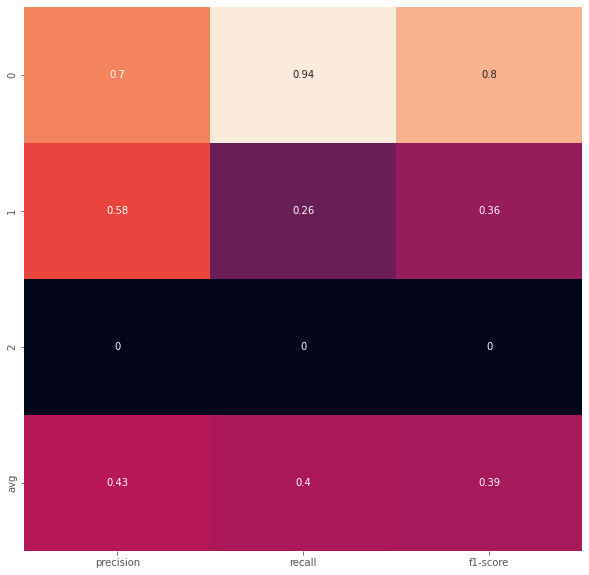

In [167]:
from sklearn.metrics import confusion_matrix

classifier2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
classifier2.fit(X_train2, y_train2)

y_pred2 = classifier2.predict(X_test2)  #predicting test results
# print("y_pred", y_pred, y_train)

err2 = accuracy_score(y_pred2,y_test2)
print(f"Accuracy score normal {err2}")
plot_classification_report(y_test2, y_pred2)

confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)


#### Oversampling

Set sizes: original:  35861  sampled:  68064
Accuracy score 0.22712459262973175
[[ 256 1004 1304]
 [  85  551  601]
 [  22   67   99]]


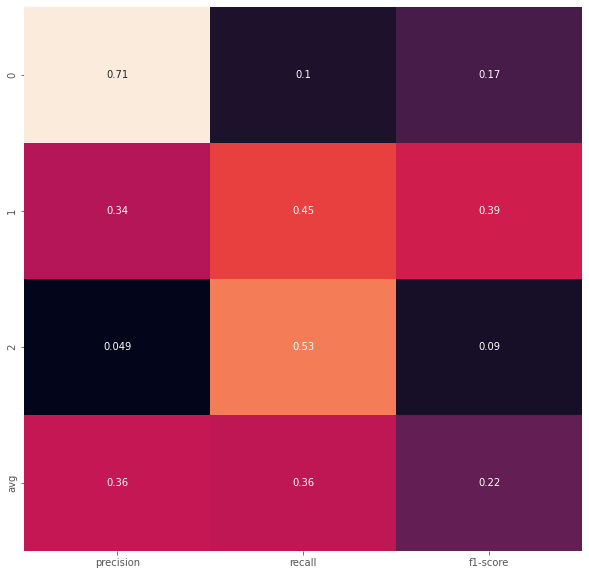

In [168]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

os2 = SMOTE(random_state=0)
columns = X_train2.columns
os_data_X2,os_data_y2=os.fit_resample(X_train2, y_train2)
os_data_X2 = pd.DataFrame(data=os_data_X2,columns=columns )
os_data_y2 = np.ravel(os_data_y2.T)

print("Set sizes: original: ", len(y_train2), " sampled: ", len(os_data_y2))
#Classifying and prediction
classifier2 = LogisticRegression(random_state = 0)  #Logistic classifier

classifier2.fit(os_data_X2, os_data_y2)

y_pred2 = classifier2.predict(X_test2)  #predicting test results
err3 = classifier2.score(X_test2,y_test2)
print(f"Accuracy score {err3}")
plot_classification_report(y_test2, y_pred2)

confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)

#### Undersampling

Undersampled from:  35861  to:  4494
Accuracy score 0.5645525194284282
[[1806  527  231]
 [ 531  361  345]
 [  74   29   85]]


C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


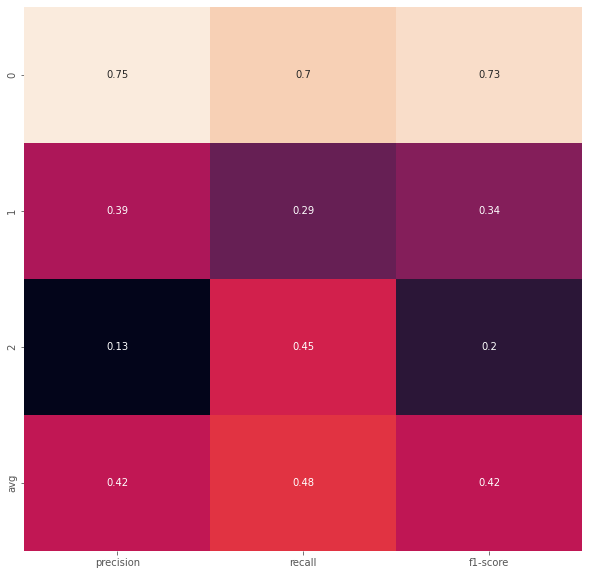

In [170]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot

undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
undersampled_x2, undersampled_y2 = undersample.fit_resample(X_train2, y_train2)
# summarize the new class distribution
print("Undersampled from: ", len(y_train2), " to: ",  len(undersampled_y2))

classifier2_undersampled = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
classifier2_undersampled.fit(undersampled_x2, undersampled_y2)

y_pred2 = classifier2_undersampled.predict(X_test2)  #predicting test results
# print("y_pred", y_pred, y_train)

err2 = accuracy_score(y_pred2,y_test2)
print(f"Accuracy score {err2}")
confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)

plot_classification_report(y_test2, y_pred2)
